# Generalized Eigendecomposition

In science, we often want to contain one condition to another. But we also want to find a concise, compressed, multivariate view on the structure of the data.
A common approach is to project the datasets into a principal component space, and compare them there. In the following, we will see why this approach might not always be desireable, and what else one can do.

We will simulate some data first.

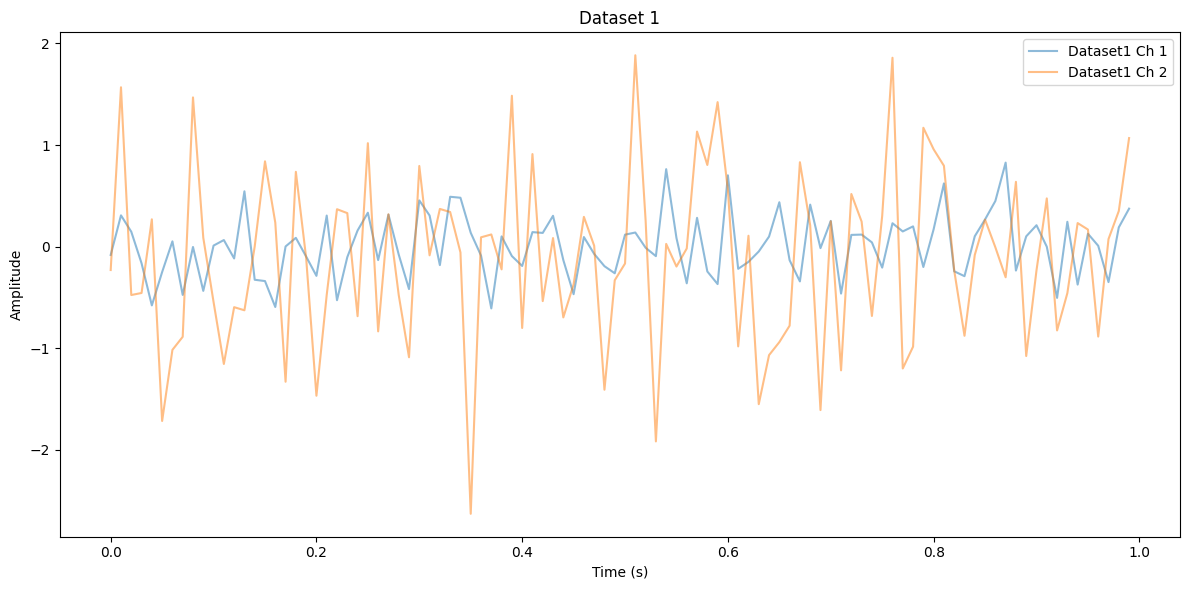

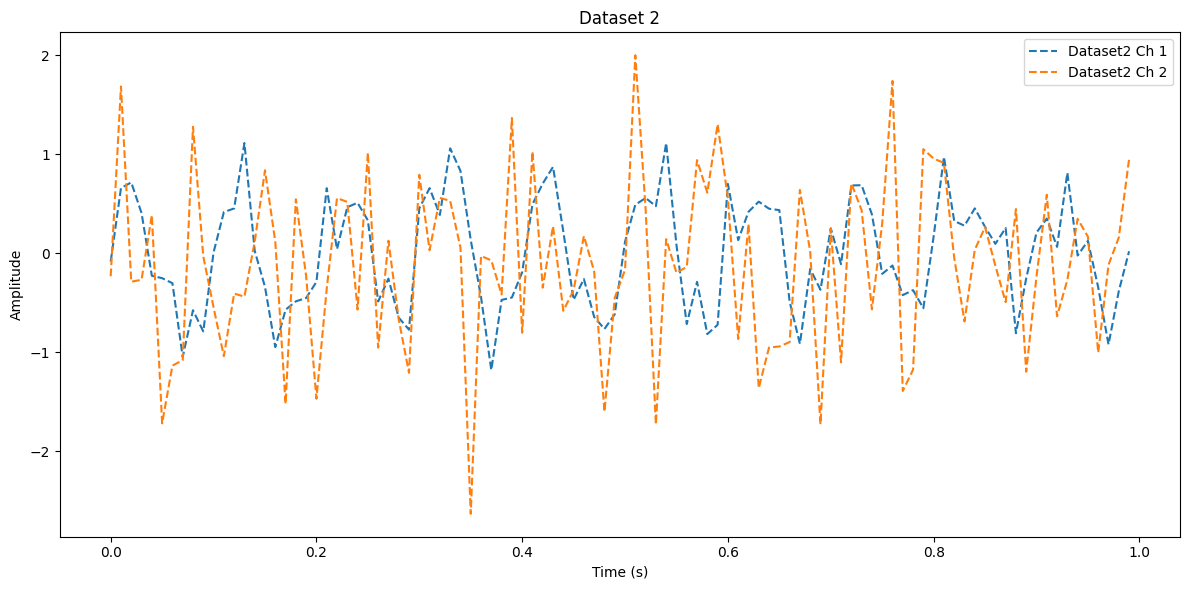

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 100  # Sampling frequency (Hz)
duration = 10  # seconds
n_samples = fs * duration
n_channels = 2

# Time vector
t = np.arange(n_samples) / fs

# 1. Generate a random positive-definite correlation matrix
np.random.seed(42)
A = np.random.randn(n_channels, n_channels)
cov_matrix = np.dot(A, A.T)  # Make it symmetric and positive-definite
cov_matrix /= np.max(np.abs(cov_matrix))  # Normalize

# 2. Generate multivariate Gaussian noise
noise = np.random.multivariate_normal(mean=np.zeros(n_channels), cov=cov_matrix, size=n_samples)

# 3. Copy the noise to make two datasets
dataset1 = noise.copy()
dataset2 = noise.copy()

# 4. Generate the 10 Hz sine wave
sine_wave = np.sin(2 * np.pi * 10 * t)

# 5. Define weights and add the sine wave to dataset2
weights = np.array([0.6, 0.2, 1.3, 0])
for i in range(n_channels):
    dataset2[:, i] += weights[i] * sine_wave

# Optional: Plot a few seconds of the data
plt.figure(figsize=(12, 6))
for i in range(n_channels):
    plt.plot(t[:100], dataset1[:100, i], label=f'Dataset1 Ch {i+1}', alpha=0.5)
plt.title("Dataset 1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(n_channels):
    plt.plot(t[:100], dataset2[:100, i], label=f'Dataset2 Ch {i+1}', linestyle='--')
plt.title("Dataset 2")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


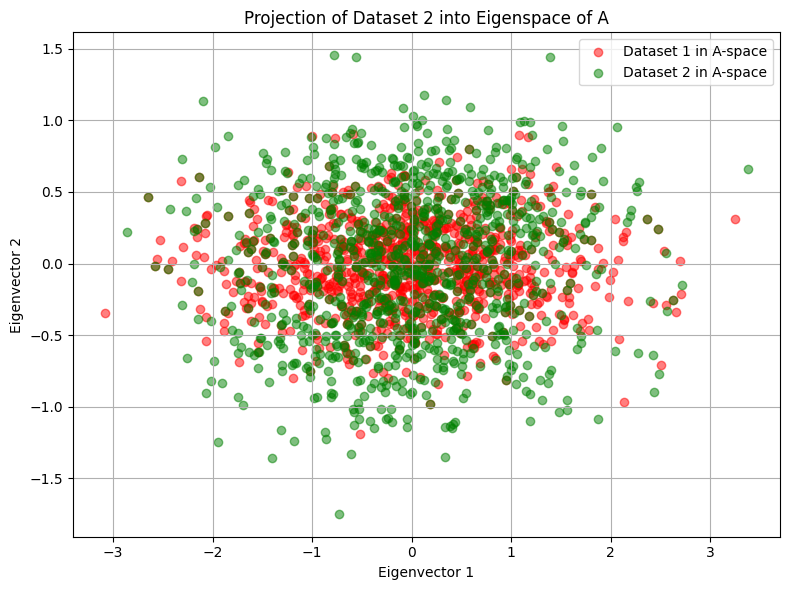

In [32]:
A = np.cov(dataset2.T)
evals, evecs = np.linalg.eig(A)

idx = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:, idx]

W = evecs[:, :2] 
proj1 = dataset1 @ W
proj2 = dataset2 @ W

plt.figure(figsize=(8, 6))
plt.scatter(proj1[:, 0], proj1[:, 1], alpha=0.5, c='red', label='Dataset 1 in A-space')
plt.scatter(proj2[:, 0], proj2[:, 1], alpha=0.5, c='green', label='Dataset 2 in A-space')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.title('Projection of Dataset 2 into Eigenspace of A')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

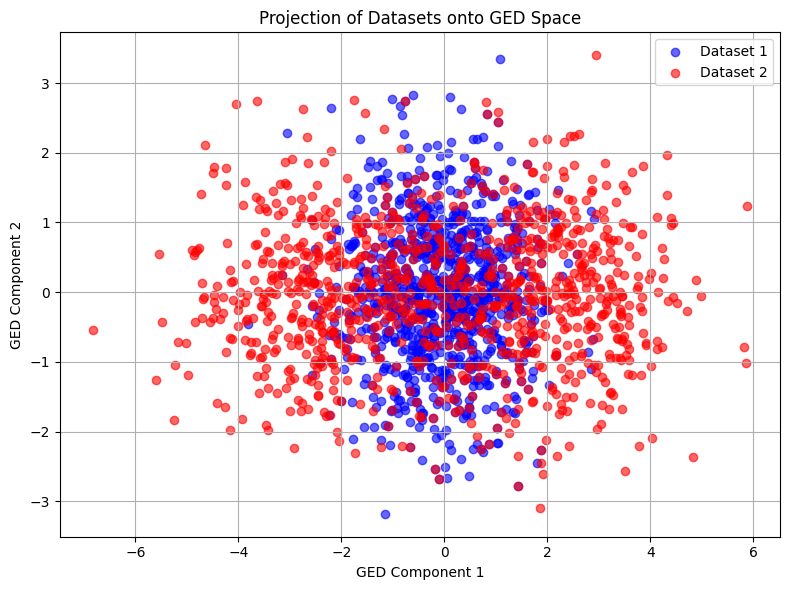

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

A = np.cov(dataset2.T)
B = np.cov(dataset1.T)

eigvals, eigvecs = eigh(A, B)

idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

W = eigvecs[:, :2]  
proj1 = dataset1 @ W  
proj2 = dataset2 @ W

plt.figure(figsize=(8, 6))
plt.scatter(proj1[:, 0], proj1[:, 1], alpha=0.6, label='Dataset 1', c='blue')
plt.scatter(proj2[:, 0], proj2[:, 1], alpha=0.6, label='Dataset 2', c='red')
plt.xlabel('GED Component 1')
plt.ylabel('GED Component 2')
plt.title('Projection of Datasets onto GED Space')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


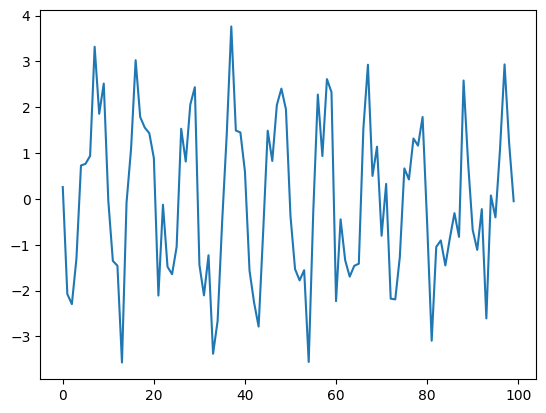

In [27]:
plt.plot((dataset2 @ W[0,:])[:100])